# Pymaceuticals Inc.
---

### Analysis

Capomulin and Ramicane had lower final tumor volumes shown by the box plots and summary statistics. This indicates that they were most effective in reducing tumor size.
+ Capomulin's Mean = 40.67 mm3 & Median = 41.56 mm3
+ Ramicane's Mean = 40.22 mm3 & Median = 40.67 mm3


Capomulin and Ramicane had very similar effectiveness; They had comparable medians and IQRs, which indiacates a similar level of effectiveness and treatment performance.
+ Capomulin's IQR: 37.69 to 45.00
+ Ramicane's IQR: 36.58 to 45.00


The summary statistics showed Ketapril and Zoniferol having some of the highest average tumor volumes suggesting they were among the least effective treatments.
+ Ketapril's Mean = 55.24 mm3, Median = 53.70 mm3
+ Zoniferol's Mean = 53.23 mm3, Median = 51.82 mm3

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice.
unique_mice = merged_df["Mouse ID"].nunique()
unique_mice

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice = duplicate_mice["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = merged_df[merged_df["Mouse ID"].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[~merged_df["Mouse ID"].isin(duplicate_mice)]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice in the clean DataFrame.
cleaned_unique_mice = cleaned_df["Mouse ID"].nunique()
cleaned_unique_mice

248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": var_tumor,
    "Tumor Volume Std. Dev.": std_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)

summary_agg_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

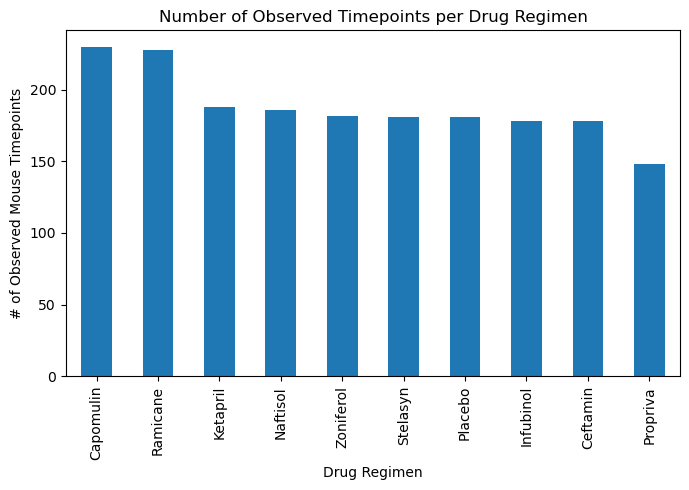

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of data points for each Drug Regimen
regimen_counts = cleaned_df["Drug Regimen"].value_counts() 

# Create bar plot using Pandas plot() method
regimen_counts.plot(kind='bar', figsize=(7,5))

# Add chart labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Observed Timepoints per Drug Regimen")
plt.tight_layout()

# Show plot
plt.show()

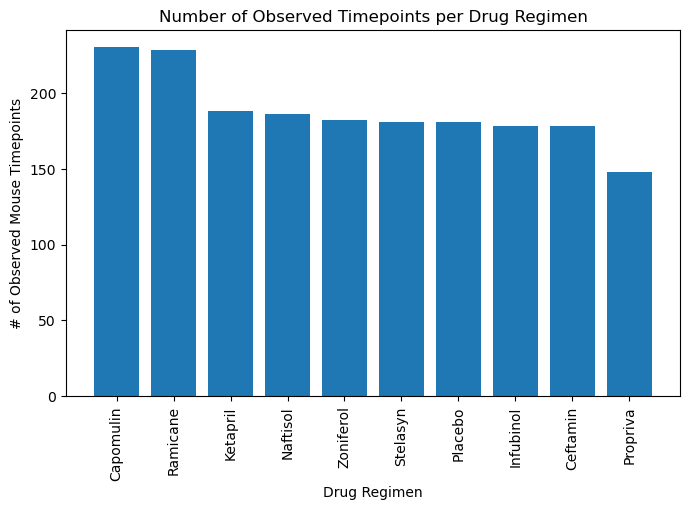

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count number of observations per regimen
regimen_counts = cleaned_df["Drug Regimen"].value_counts()

# Create bar chart using Pyplot
plt.figure(figsize=(7,5))
plt.bar(regimen_counts.index, regimen_counts.values)

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Number of Observed Timepoints per Drug Regimen")

# Show plot
plt.show()

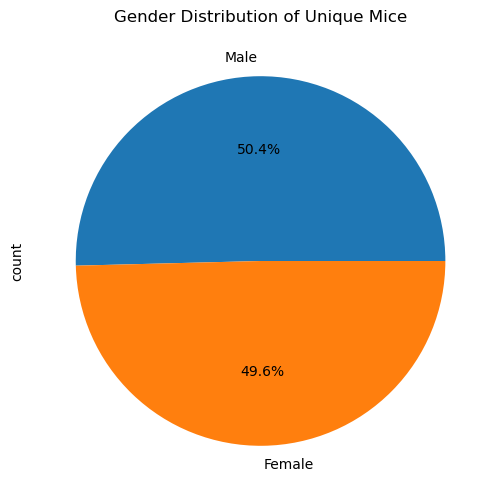

In [66]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_df.drop_duplicates(subset="Mouse ID")[["Mouse ID", "Sex"]]
gender_counts = unique_mice_gender["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Gender Distribution of Unique Mice")
plt.show()

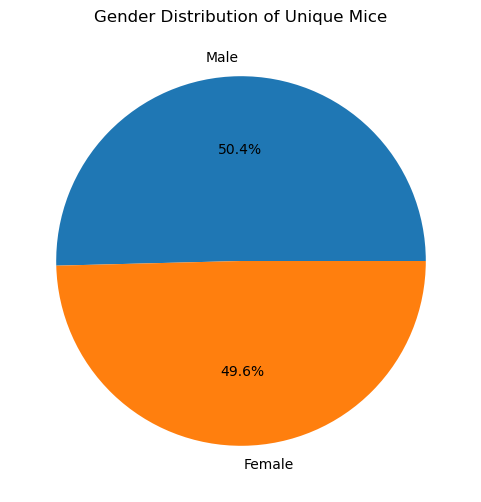

In [65]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_df.drop_duplicates(subset="Mouse ID")[["Mouse ID", "Sex"]]
gender_counts = unique_mice_gender["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution of Unique Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(last_timepoint, cleaned_df, on=["Mouse ID", "Timepoint"])

# Filter for the four treatment regimens of interest
selected_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df = final_tumor_df[final_tumor_df["Drug Regimen"].isin(selected_drugs)]
filtered_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = filtered_df.loc[filtered_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(drug_data)

    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\david\AppData\Local\Temp\ipykernel_32316\2358616141.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flier_style)


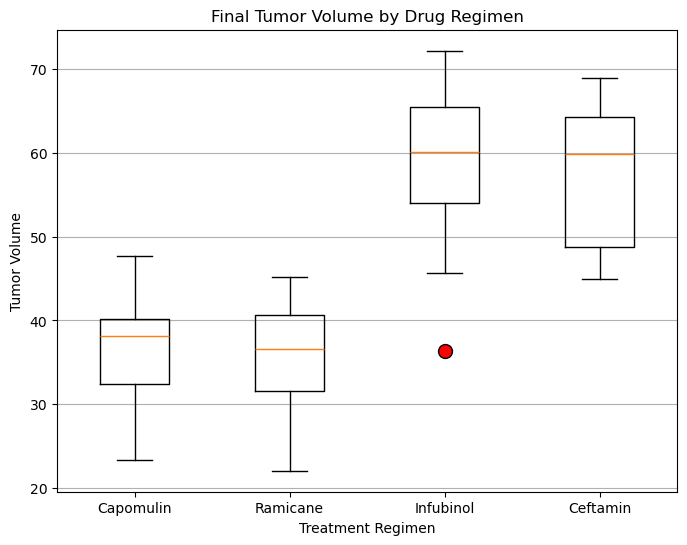

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8,6))

# Customize outlier appearance using flierprops
flier_style = dict(marker='o', markerfacecolor='red', markersize=10)

plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flier_style)

# Add titles and labels
plt.title("Final Tumor Volume by Drug Regimen")
plt.ylabel("Tumor Volume")
plt.xlabel("Treatment Regimen")


# Show plot
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume in mm3')

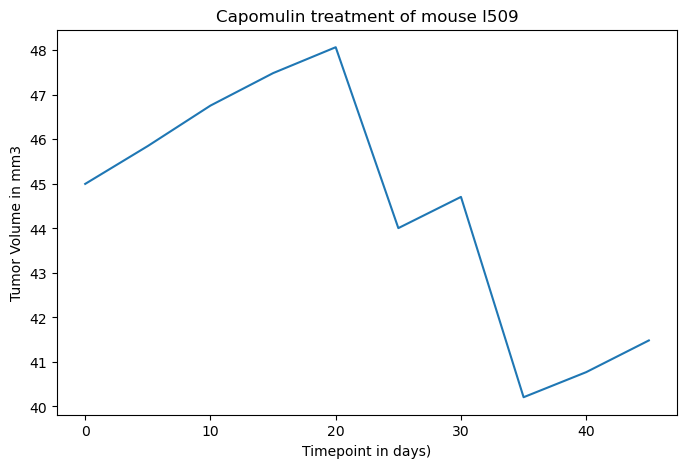

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

single_mouse = capomulin_df[capomulin_df["Mouse ID"] == "l509"]

plt.figure(figsize=(8,5))
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"])

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint in days)")
plt.ylabel("Tumor Volume in mm3")

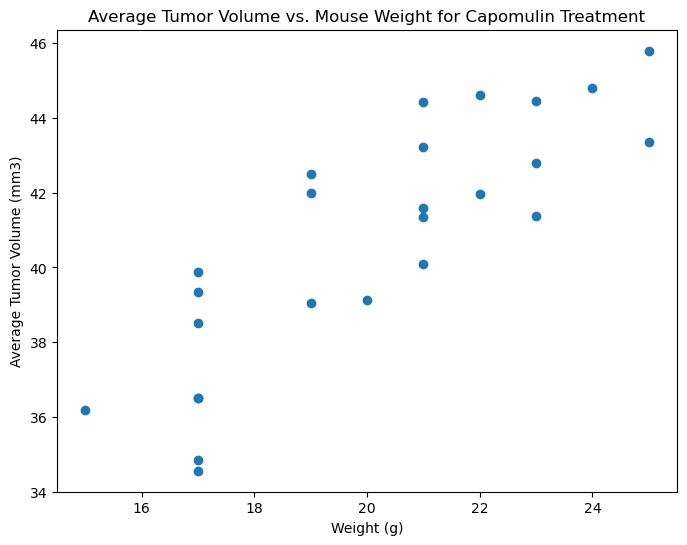

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

avg_volume_df = capomulin_df.groupby("Mouse ID").mean(numeric_only=True)

plt.figure(figsize=(8,6))
plt.scatter(avg_volume_df["Weight (g)"], avg_volume_df["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Treatment")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


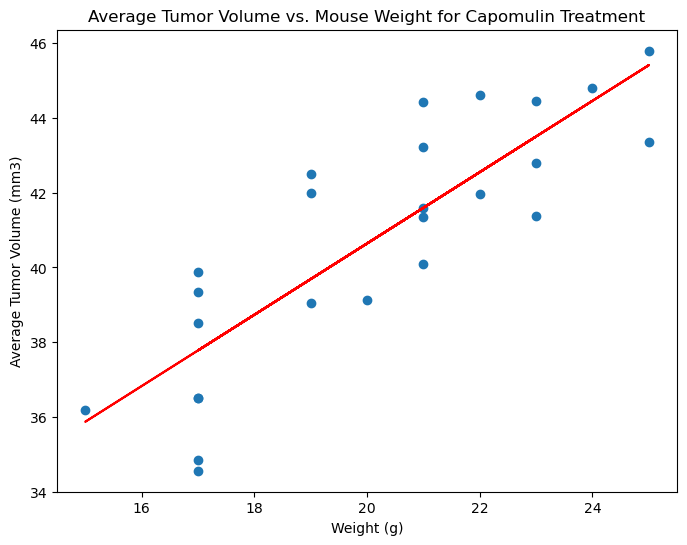

In [64]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Get x and y values
x = avg_volume_df["Weight (g)"]
y = avg_volume_df["Tumor Volume (mm3)"]

# Calculation - correlation coefficient
correlation = st.pearsonr(x, y)[0]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
regression_line = slope * x + intercept

# Plot scatter and regression line
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(x, regression_line, color="red")

# Labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Treatment")

plt.show()